In [2]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [3]:
img = mpimg.imread('../data/lena.png')

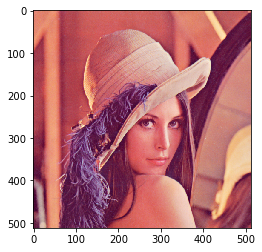

In [4]:
plt.imshow(img)

In [5]:
bw = img.mean(axis=2)

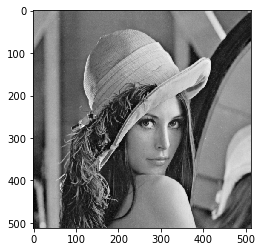

In [6]:
plt.imshow(bw, cmap='gray')

In [7]:
# create gaussian filter
W = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i,j] = np.exp(-dist / 50)

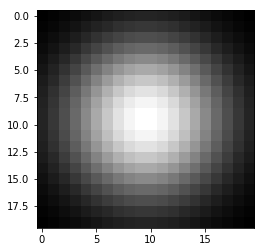

In [8]:
plt.imshow(W, cmap='gray')

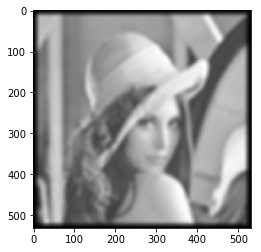

In [9]:
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')

In [10]:
bw.shape

(512, 512)

In [11]:
out.shape

(531, 531)

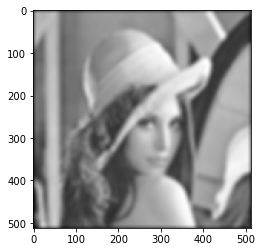

In [12]:
out = convolve2d(bw, W, mode='same')
plt.imshow(out, cmap='gray')

In [13]:
out.shape

(512, 512)

In [14]:
out3 = np.zeros(img.shape)
for i in range(3):
    out3[:, :, i] = convolve2d(img[:,:,i], W, mode='same')

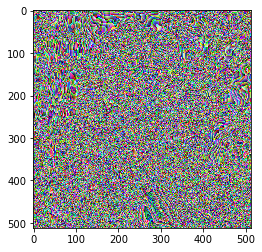

In [15]:
plt.imshow(out3)

### Edge Detection

In [16]:
Hx = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
], dtype=np.float32)

In [17]:
Hy = Hx.T

In [18]:
Hy

array([[-1., -2., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  2.,  1.]], dtype=float32)

In [19]:
Gx = convolve2d(bw, Hx)

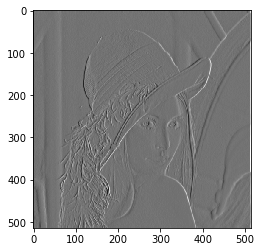

In [20]:
plt.imshow(Gx, cmap='gray')

In [21]:
Gy = convolve2d(bw, Hy)

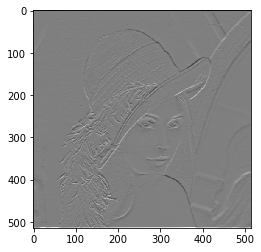

In [22]:
plt.imshow(Gy, cmap='gray')

In [23]:
G = np.sqrt(Gx*Gx + Gy*Gy)

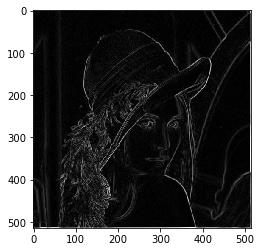

In [24]:
plt.imshow(G, cmap='gray')

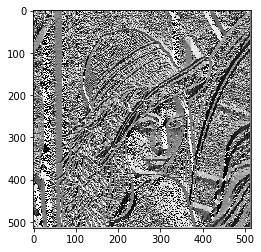

In [25]:
theta = np.arctan2(Gy, Gx)
plt.imshow(theta, cmap='gray')